# Modeling
### Author: Ehsan Gharib-Nezhad


In [138]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.probability import FreqDist
import re

# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
# Dataset 1: Human dataset
# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

In [2]:
# Load datasets
human = pd.read_csv('../outputs/processed_human_sequence.csv')

In [3]:
human.head()

,sequence,class,sequence_length,A_count,T_count,G_count,C_count
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4,207,80,45,13,69
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4,681,206,174,71,230
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,1686,476,483,393,334
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,1206,339,363,294,210
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3,1437,417,406,326,288


## Convert A, T, G, C to integers
- A: 0
- T: 1
- G: 2
- C: 3

In [123]:
human['sequence_in_numbers'] = [ seq.replace("A", '0').replace("T", '1').replace("G", '2').replace("C", '3') 
                                for seq in human['sequence']]

In [132]:
human['sequence_in_numbers']

0       0123333003100010310332101223330330100110333330...
1       0120032000013121132311301130112333330300133102...
2       0121212230111222323121112230212012011233111312...
3       0121212230111222323121112230212012011233111312...
4       0123003023011112001112001033020330002122012212...
                              ...                        
4375    0122002011122022000301101112002001112000031011...
4376    0123021331113222023000230211033032200033023000...
4377    0123021331113222023000230211033032200033023000...
4378    0122223033122111231213121212230021222330211033...
4379    0123021331113222023000230211033032200033023000...
Name: sequence_in_numbers, Length: 4380, dtype: object

## Generate Kmers
`Defination`: k-mers are substrings of length k contained within a biological sequence.k-mers are composed of nucleotides (i.e. A, T, G, and C) [[Ref]](https://en.wikipedia.org/wiki/K-mer)

In [133]:
def CreateKmers(sequence, kmer_length):
    """
    This function calculate k-mers  
    Inputs: 
        - sequence: which ic DNA sequence length, for example "ATGCCCCAACTAAATACTACCGTATGGCCCACCAT..."
        - kmer_length: which is 1 ... len(sequence)
    OUTPUTS: 
        - kmers
            example: if kmer_length=2, then: "AT, GC, CC, CA, AC, ..."
    """  
    return [sequence[x:x+kmer_length].lower() for x in range(len(sequence) - kmer_length + 1)]

In [527]:
human['2mer'] = human.apply(lambda x: CreateKmers(x['sequence'], 2), axis=1)
human['3mer'] = human.apply(lambda x: CreateKmers(x['sequence'], 3), axis=1)
human['4mer'] = human.apply(lambda x: CreateKmers(x['sequence'], 4), axis=1)
human['5mer'] = human.apply(lambda x: CreateKmers(x['sequence'], 5), axis=1)
human['6mer'] = human.apply(lambda x: CreateKmers(x['sequence'], 6), axis=1)
human['7mer'] = human.apply(lambda x: CreateKmers(x['sequence'], 7), axis=1)
human['8mer'] = human.apply(lambda x: CreateKmers(x['sequence'], 8), axis=1)
human['9mer'] = human.apply(lambda x: CreateKmers(x['sequence'], 9), axis=1)
human['10mer'] = human.apply(lambda x: CreateKmers(x['sequence'], 10), axis=1)
# human = human.drop('sequence', axis=1)

In [528]:
human.head()

,sequence,class,sequence_length,A_count,T_count,G_count,C_count,2mer,3mer,4mer,sequence_in_numbers,5mer,6mer,7mer,8mer,9mer,10mer
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4,207,80,45,13,69,"[at, tg, gc, cc, cc, cc, ca, aa, ac, ct, ta, a...","[atg, tgc, gcc, ccc, ccc, cca, caa, aac, act, ...","[atgc, tgcc, gccc, cccc, ccca, ccaa, caac, aac...",0123333003100010310332101223330330100110333330...,"[atgcc, tgccc, gcccc, cccca, cccaa, ccaac, caa...","[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac...","[atgcccc, tgcccca, gccccaa, ccccaac, cccaact, ...","[atgcccca, tgccccaa, gccccaac, ccccaact, cccaa...","[atgccccaa, tgccccaac, gccccaact, ccccaacta, c...","[atgccccaac, tgccccaact, gccccaacta, ccccaacta..."
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4,681,206,174,71,230,"[at, tg, ga, aa, ac, cg, ga, aa, aa, aa, at, t...","[atg, tga, gaa, aac, acg, cga, gaa, aaa, aaa, ...","[atga, tgaa, gaac, aacg, acga, cgaa, gaaa, aaa...",0120032000013121132311301130112333330300133102...,"[atgaa, tgaac, gaacg, aacga, acgaa, cgaaa, gaa...","[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa...","[atgaacg, tgaacga, gaacgaa, aacgaaa, acgaaaa, ...","[atgaacga, tgaacgaa, gaacgaaa, aacgaaaa, acgaa...","[atgaacgaa, tgaacgaaa, gaacgaaaa, aacgaaaat, a...","[atgaacgaaa, tgaacgaaaa, gaacgaaaat, aacgaaaat..."
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,1686,476,483,393,334,"[at, tg, gt, tg, gt, tg, gg, gc, ca, at, tt, t...","[atg, tgt, gtg, tgt, gtg, tgg, ggc, gca, cat, ...","[atgt, tgtg, gtgt, tgtg, gtgg, tggc, ggca, gca...",0121212230111222323121112230212012011233111312...,"[atgtg, tgtgt, gtgtg, tgtgg, gtggc, tggca, ggc...","[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca...","[atgtgtg, tgtgtgg, gtgtggc, tgtggca, gtggcat, ...","[atgtgtgg, tgtgtggc, gtgtggca, tgtggcat, gtggc...","[atgtgtggc, tgtgtggca, gtgtggcat, tgtggcatt, g...","[atgtgtggca, tgtgtggcat, gtgtggcatt, tgtggcatt..."
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,1206,339,363,294,210,"[at, tg, gt, tg, gt, tg, gg, gc, ca, at, tt, t...","[atg, tgt, gtg, tgt, gtg, tgg, ggc, gca, cat, ...","[atgt, tgtg, gtgt, tgtg, gtgg, tggc, ggca, gca...",0121212230111222323121112230212012011233111312...,"[atgtg, tgtgt, gtgtg, tgtgg, gtggc, tggca, ggc...","[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca...","[atgtgtg, tgtgtgg, gtgtggc, tgtggca, gtggcat, ...","[atgtgtgg, tgtgtggc, gtgtggca, tgtggcat, gtggc...","[atgtgtggc, tgtgtggca, gtgtggcat, tgtggcatt, g...","[atgtgtggca, tgtgtggcat, gtgtggcatt, tgtggcatt..."
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3,1437,417,406,326,288,"[at, tg, gc, ca, aa, ac, ca, ag, gc, ca, at, t...","[atg, tgc, gca, caa, aac, aca, cag, agc, gca, ...","[atgc, tgca, gcaa, caac, aaca, acag, cagc, agc...",0123003023011112001112001033020330002122012212...,"[atgca, tgcaa, gcaac, caaca, aacag, acagc, cag...","[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc...","[atgcaac, tgcaaca, gcaacag, caacagc, aacagca, ...","[atgcaaca, tgcaacag, gcaacagc, caacagca, aacag...","[atgcaacag, tgcaacagc, gcaacagca, caacagcat, a...","[atgcaacagc, tgcaacagca, gcaacagcat, caacagcat..."


---

In [529]:
def freq_table(text, count=None):

    freqs = FreqDist(text).most_common()
    prob = [round(x[1]/len(text),4) for x in freqs]

    freq = zip(freqs,prob)

    comp_freqs = []
    for s,p in freq:
        comp_freqs.append([s[0],s[1],p])

    comp_freqs.sort(key=lambda tup: tup[1], reverse=True) #Sort the list so it's in order, big to small

    if count == None:
        most = comp_freqs[:26]    
        hapax = comp_freqs[:-25:-1]
    else:
        most = comp_freqs[:count + 1]
        hapax = comp_freqs[:-count:-1]

    print('Most Common \t\t  Least Common')

    for i in zip(most, hapax):
        print(i[0], " "*(24-len(str(i[0]))),i[1])

In [530]:
freq_table(human['2mer'][0], count=10)

Most Common 		  Least Common
['aa', 36, 0.1748]        ['gg', 1, 0.0049]
['cc', 31, 0.1505]        ['gt', 2, 0.0097]
['ac', 22, 0.1068]        ['ag', 3, 0.0146]
['ca', 20, 0.0971]        ['cg', 3, 0.0146]
['at', 19, 0.0922]        ['ga', 4, 0.0194]
['ta', 19, 0.0922]        ['gc', 5, 0.0243]
['ct', 15, 0.0728]        ['tg', 6, 0.0291]
['tc', 11, 0.0534]        ['tt', 9, 0.0437]
['tt', 9, 0.0437]         ['tc', 11, 0.0534]


In [531]:
freq_table(human['3mer'][0], count=10)

Most Common 		  Least Common
['aaa', 19, 0.0927]       ['tag', 1, 0.0049]
['ccc', 13, 0.0634]       ['ttg', 1, 0.0049]
['cca', 10, 0.0488]       ['gct', 1, 0.0049]
['acc', 10, 0.0488]       ['cgc', 1, 0.0049]
['aac', 8, 0.039]         ['tcg', 1, 0.0049]
['aat', 8, 0.039]         ['gtt', 1, 0.0049]
['caa', 7, 0.0341]        ['tgt', 1, 0.0049]
['cta', 7, 0.0341]        ['tct', 1, 0.0049]
['taa', 7, 0.0341]        ['cga', 1, 0.0049]


In [536]:
def report_top_kmers(seqence, 
                     kmers, 
                     gene_family_class, 
                     top_numbers):
    
    plt.figure(figsize=(12, 4))
    plt.title(f'Top {top_numbers} {kmers} in gene family class = {gene_family_class}', fontsize = 16)
    plt.xlabel(f'{kmers} labels', fontsize = 12)
    plt.ylabel(f'{kmers} count %', fontsize = 12)
    freqs = FreqDist(
        sum(seqence[seqence['class'] == gene_family_class][kmers].to_list(),[])).most_common(top_numbers)

    x = [x[0] for x in freqs]
    y = [x[1] for x in freqs]

    sns.barplot(x=x, y=(y/np.max(y))*100)

    plt.xticks(fontsize=12,rotation=20)
    plt.yticks(fontsize=12);



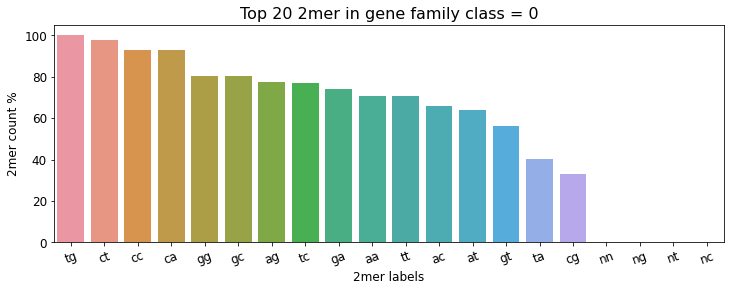

In [537]:
report_top_kmers(human, 
                 kmers = '2mer', 
                 gene_family_class = 0, 
                 top_numbers = 20)

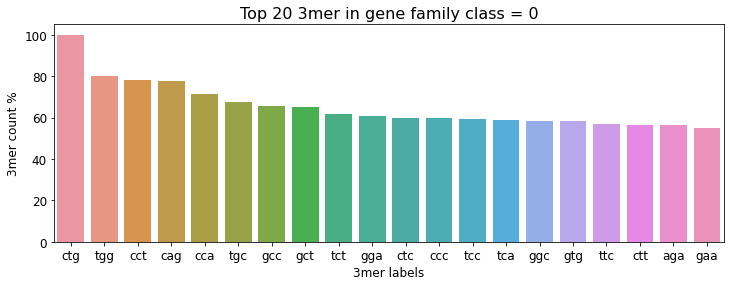

In [291]:
report_top_kmers(human, 
                 kmers = '3mer', 
                 gene_family_class = 0, 
                 top_numbers = 20)

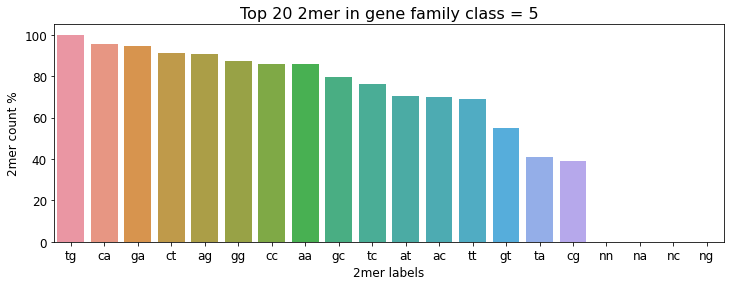

In [292]:
report_top_kmers(human, 
                 kmers = '2mer', 
                 gene_family_class = 5, 
                 top_numbers = 20)

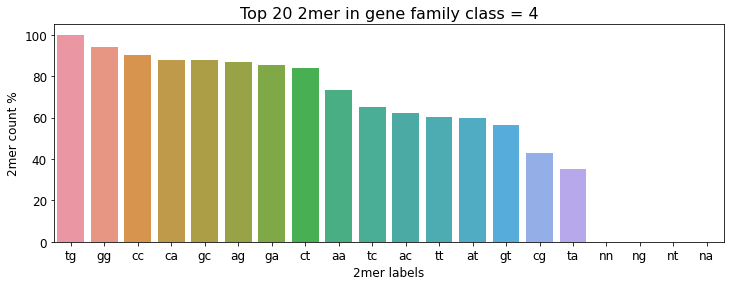

In [293]:
report_top_kmers(human, 
                 kmers = '2mer', 
                 gene_family_class = 4, 
                 top_numbers = 20)

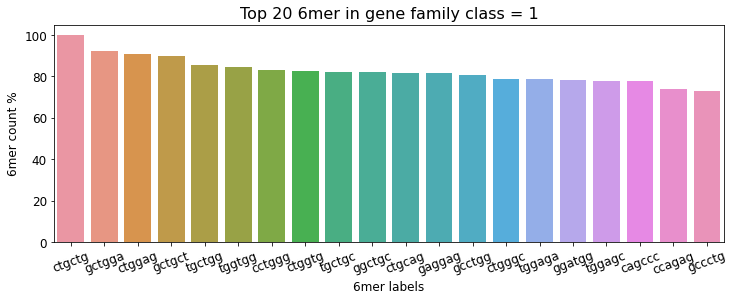

In [538]:
report_top_kmers(human, 
                 kmers = '6mer', 
                 gene_family_class = 1, 
                 top_numbers = 20)

## Combine all sequence for each class

In [506]:
# sum(human[human['class'] == 0]['2mer'].to_list(),[])

## Create the X dataset

In [539]:
X_2mer = [sum(human[human['class'] == i]['2mer'].to_list(),[]) for i in range(7) ]

X_3mer = [sum(human[human['class'] == i]['3mer'].to_list(),[]) for i in range(7) ]

X_4mer = [sum(human[human['class'] == i]['4mer'].to_list(),[]) for i in range(7) ]

X_5mer = [sum(human[human['class'] == i]['5mer'].to_list(),[]) for i in range(7) ]

X_6mer = [sum(human[human['class'] == i]['6mer'].to_list(),[]) for i in range(7) ]

X_7mer = [sum(human[human['class'] == i]['7mer'].to_list(),[]) for i in range(7) ]

X_8mer = [sum(human[human['class'] == i]['8mer'].to_list(),[]) for i in range(7) ]

X_9mer = [sum(human[human['class'] == i]['9mer'].to_list(),[]) for i in range(7) ]

In [540]:
X = list(chain.from_iterable(  ( [sum(X_2mer,[])] , [sum(X_3mer,[])] , [sum(X_4mer,[])],
                                 [sum(X_5mer,[])] , [sum(X_6mer,[])] , [sum(X_7mer,[])],
                                 [sum(X_8mer,[])] , [sum(X_9mer,[])] ) ))

In [541]:
X = list(chain.from_iterable(X))

In [542]:
len(X)

44118822

In [548]:
X

['at',
 'tg',
 'ga',
 'ag',
 'gg',
 'gc',
 'cc',
 'cc',
 'cg',
 'ga',
 'ag',
 'gc',
 'cg',
 'gt',
 'tc',
 'cc',
 'cc',
 'cc',
 'cg',
 'gg',
 'gc',
 'cc',
 'cg',
 'gc',
 'cg',
 'gc',
 'cg',
 'gg',
 'gc',
 'ca',
 'ag',
 'gc',
 'cg',
 'gc',
 'cc',
 'cc',
 'cc',
 'cc',
 'cg',
 'gg',
 'gc',
 'cc',
 'cc',
 'cg',
 'ga',
 'at',
 'tg',
 'gg',
 'ga',
 'ag',
 'ga',
 'ac',
 'cc',
 'cc',
 'cc',
 'cg',
 'gc',
 'cc',
 'cg',
 'gt',
 'tg',
 'gg',
 'gg',
 'ga',
 'ac',
 'cc',
 'cc',
 'ca',
 'ag',
 'gc',
 'cc',
 'cc',
 'cg',
 'gc',
 'ca',
 'aa',
 'ac',
 'cg',
 'ga',
 'ac',
 'ct',
 'tc',
 'cg',
 'gc',
 'ct',
 'tg',
 'gc',
 'cc',
 'cg',
 'gc',
 'cc',
 'cc',
 'ca',
 'ac',
 'cg',
 'gc',
 'ct',
 'tg',
 'ga',
 'ac',
 'cc',
 'cc',
 'cc',
 'cg',
 'gg',
 'gc',
 'cc',
 'cg',
 'gt',
 'tg',
 'gc',
 'cc',
 'cc',
 'cc',
 'cc',
 'cc',
 'ct',
 'ta',
 'ac',
 'cg',
 'gt',
 'tg',
 'ga',
 'aa',
 'ag',
 'gc',
 'ct',
 'tt',
 'tg',
 'gg',
 'gc',
 'cc',
 'ct',
 'tc',
 'ca',
 'ac',
 'cc',
 'cg',
 'gt',
 'tc',
 'cg',
 'gt',
 'tc',

## Create the y dataset

In [543]:
y_2mer = list(chain.from_iterable([len(X_2mer[i])*[i] for i in range(7)]))
y_3mer = list(chain.from_iterable([len(X_3mer[i])*[i] for i in range(7)]))
y_4mer = list(chain.from_iterable([len(X_4mer[i])*[i] for i in range(7)]))
y_5mer = list(chain.from_iterable([len(X_5mer[i])*[i] for i in range(7)]))
y_6mer = list(chain.from_iterable([len(X_6mer[i])*[i] for i in range(7)]))
y_7mer = list(chain.from_iterable([len(X_7mer[i])*[i] for i in range(7)]))
y_8mer = list(chain.from_iterable([len(X_8mer[i])*[i] for i in range(7)]))
y_9mer = list(chain.from_iterable([len(X_9mer[i])*[i] for i in range(7)]))

In [544]:
y = list(chain.from_iterable([y_2mer, y_3mer, y_4mer,
                              y_5mer, y_6mer, y_7mer,
                              y_8mer, y_9mer ]))

In [545]:
len(y)

44118822

In [559]:
np.reshape(y, (len(y),1))

array([[0],
       [0],
       [0],
       ...,
       [6],
       [6],
       [6]])

## Create Kmer and Gene Family class dataset

In [564]:
human_processed_dataset = pd.DataFrame(data=X, columns=['kmers'])
human_processed_dataset['class'] = y
human_processed_dataset

,kmers,class
0,at,0
1,tg,0
2,ga,0
3,ag,0
4,gg,0
...,...,...
44118817,gtcacatta,6
44118818,tcacattat,6
44118819,cacattatc,6
44118820,acattatca,6


In [565]:
human_processed_dataset.to_csv('../datasets/human_processed_dataset.csv', 
                               columns = human_processed_dataset.columns, 
                               index_label = False)

<AxesSubplot:>

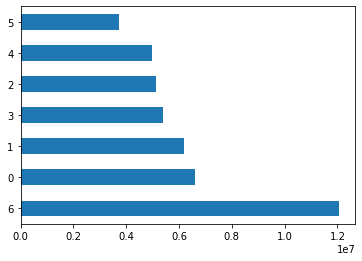

In [569]:
pd.read_csv('../datasets/human_processed_dataset.csv')['class'].value_counts().plot(kind='barh')

# Modeling

---

We may want to test lots of different values of hyperparameters in our CountVectorizer.

<details><summary>Why do we need a pipeline to GridSearch over our CountVectorizer hyperparameters?</summary>
    
- The CountVectorizer is a transformer.
- Transformers have .fit() and .transform() methods, but cannot do .predict().
- In order to GridSearch over hyperparameters, we need some way to score our model performance.
- A pipeline stacks together one or more transformers with an estimator at the end. The estimator allows us to .predict() and get a score!
</details>

In [510]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

## Baseline accuracy

We need to calculate baseline accuracy in order to tell if our model is better than null model.

In [511]:
pd.DataFrame(y_train).value_counts(normalize=True), pd.DataFrame(y_test).value_counts(normalize=True)

(6    0.273785
 0    0.149941
 1    0.140533
 3    0.122698
 2    0.116111
 4    0.112569
 5    0.084362
 dtype: float64,
 6    0.273785
 0    0.149942
 1    0.140533
 3    0.122698
 2    0.116111
 4    0.112569
 5    0.084362
 dtype: float64)

In [513]:
cvec = CountVectorizer()

In [514]:
# Fit & transform the vectorizer on our training corpus.
Xcv_train = cvec.fit_transform(X_train)

In [515]:
# to convert sparse matrix to dense matrix
Xcv_train_df = pd.DataFrame(Xcv_train.todense(),
                           columns = cvec.get_feature_names() )
Xcv_train_df.head()

,aa,aaa,aaaa,aaac,aaag,aaat,aac,aaca,aacc,aacg,...,ttg,ttga,ttgc,ttgg,ttgt,ttt,ttta,tttc,tttg,tttt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [516]:
Xcv_train_df.shape

(11106862, 440)

In [517]:
# Transform the test corpus.
Xcv_test = cvec.transform(X_test)

In [518]:
# to convert sparse matrix to dense matrix
Xcv_test_df = pd.DataFrame(Xcv_test.todense(),
                           columns = cvec.get_feature_names() )
Xcv_test_df.head()

,aa,aaa,aaaa,aaac,aaag,aaat,aac,aaca,aacc,aacg,...,ttg,ttga,ttgc,ttgg,ttgt,ttt,ttta,tttc,tttg,tttt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [519]:
Xcv_test_df.shape

(5470544, 440)

In [520]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [521]:
# Let's set a pipeline up with two stages:
# 1. CountVectorizer (transformer)
# 2. Multinomial Naive Bayes (estimator)

pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('mnb', MultinomialNB())
])

In [522]:
# Search over the following values of hyperparameters:
# Maximum number of features fit: 2000, 3000, 4000, 5000
# Minimum number of documents needed to include token: 2, 3
# Maximum number of documents needed to include token: 90%, 95%
# Check (individual tokens) and also check (individual tokens and 2-grams).

pipe_params = {
    'cvec__max_features': [3, 5, 10],
#     'cvec__min_df': [2, 3],
#     'cvec__max_df': [.9, .95],
#     'cvec__ngram_range': [(1,1), (1,2)]
}

In [523]:
# Instantiate GridSearchCV.

gs = GridSearchCV(pipe, # what object are we optimizing?
                  pipe_params, # what parameters values are we searching?
                cv =5) # 5-fold cross-validation.

In [524]:
# Fit GridSearch to training data.
# Fit GridSearch to training data.
gs.fit(X_train, y_train )

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('mnb', MultinomialNB())]),
             param_grid={'cvec__max_features': [3, 5, 10]})

In [525]:
# What's the best score?

gs.best_params_

{'cvec__max_features': 3}

In [526]:
# Score model on training set.

gs.score(X_train, y_train) , gs.score(X_test, y_test)

(0.2737854310245324, 0.2737853858775288)